# AI Engineer Roadmap
## AI Engineering Concepts
### https://zazencodes.com/courses/ai-engineer-roadmap#ai-engineering-concepts

In [9]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

model = GPT2LMHeadModel.from_pretrained("gpt2")
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

input_text = "The future of AI is"
input_ids = tokenizer.encode(input_text, return_tensors="pt")

output = model.generate(
    input_ids,
    max_length=50,
    temperature=0.7,
    top_p=0.9,
    do_sample=True
)

print(tokenizer.decode(output[0], skip_special_tokens=True))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


The future of AI is uncertain, and it's a good thing that we've got a good way to manage it," said James.

Explore further: AI is transforming the way we think about our world


In [10]:
output

tensor([[  464,  2003,   286,  9552,   318,  8627,    11,   290,   340,   338,
           257,   922,  1517,   326,   356,  1053,  1392,   257,   922,   835,
           284,  6687,   340,   553,   531,  3700,    13,   198,   198, 35433,
          2252,    25,  9552,   318, 25449,   262,   835,   356,   892,   546,
           674,   995, 50256]])

In [11]:
type(output)

torch.Tensor

In [ ]:
from transformers import Trainer, TrainingArguments, AutoModelForSequenceClassification, AutoTokenizer
from datasets import Dataset

model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Example data
train_texts = [
    "This movie was dope, I loved every minute of it!",
    "Trashhhh",
    "A masterpiece of modern cinema. Totally sick",
    "I fell asleep halfway through, very boring."
]
train_labels = [1, 0, 1, 0]  # 1 for positive, 0 for negative sentiment

# Prepare the dataset
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=512)
train_encodings.update({"labels": train_labels})
train_dataset = Dataset.from_dict(train_encodings)

# Define training arguments
training_args = TrainingArguments(
    output_dir="./data",
    evaluation_strategy="epoch",
    per_device_train_batch_size=8,
    num_train_epochs=3,
    save_steps=10_000,
    save_total_limit=2
)

# Train the model
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=train_dataset  # Using same data for demo purposes
)

trainer.train()


/Users/alex/pro/zazencodes-courses/ai-engineer-roadmap/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/Users/alex/pro/zazencodes-courses/ai-engineer-roadmap/venv/lib/python3.12/site-packages/transformers/training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


TrainOutput(global_step=3, training_loss=0.5257712205251058, metrics={'train_runtime': 23.2145, 'train_samples_per_second': 0.517, 'train_steps_per_second': 0.129, 'total_flos': 92499980400.0, 'train_loss': 0.5257712205251058, 'epoch': 3.0})

In [14]:
updated_weights = model.state_dict()
updated_weights.keys()

odict_keys(['bert.embeddings.word_embeddings.weight', 'bert.embeddings.position_embeddings.weight', 'bert.embeddings.token_type_embeddings.weight', 'bert.embeddings.LayerNorm.weight', 'bert.embeddings.LayerNorm.bias', 'bert.encoder.layer.0.attention.self.query.weight', 'bert.encoder.layer.0.attention.self.query.bias', 'bert.encoder.layer.0.attention.self.key.weight', 'bert.encoder.layer.0.attention.self.key.bias', 'bert.encoder.layer.0.attention.self.value.weight', 'bert.encoder.layer.0.attention.self.value.bias', 'bert.encoder.layer.0.attention.output.dense.weight', 'bert.encoder.layer.0.attention.output.dense.bias', 'bert.encoder.layer.0.attention.output.LayerNorm.weight', 'bert.encoder.layer.0.attention.output.LayerNorm.bias', 'bert.encoder.layer.0.intermediate.dense.weight', 'bert.encoder.layer.0.intermediate.dense.bias', 'bert.encoder.layer.0.output.dense.weight', 'bert.encoder.layer.0.output.dense.bias', 'bert.encoder.layer.0.output.LayerNorm.weight', 'bert.encoder.layer.0.output

In [18]:
original_weights = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2).to("mps:0").state_dict()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [19]:
import torch

In [20]:
weights_changed = any(not torch.equal(original_weights[k], updated_weights[k]) for k in original_weights)
weights_changed

True

In [26]:
import torch
import torch.nn.functional as F

model = model.to("cpu")

# Set model to evaluation mode
model.eval()

# Define new test sentences
test_texts = [
    "This film was an absolute joy to watch!",
    "Horrible experience, never watching this again.",
    "It was okay, not great but not terrible either."
]

# Tokenize inputs
inputs = tokenizer(test_texts, truncation=True, padding=True, max_length=512, return_tensors="pt")

# Perform inference
with torch.no_grad():
    outputs = model(**inputs)

logits = outputs.logits
probs = F.softmax(logits, dim=-1)  # Convert to probabilities
predictions = torch.argmax(probs, dim=-1)  # Get class predictions

# Print results
for text, pred, prob in zip(test_texts, predictions, probs):
    sentiment = "Positive" if pred.item() == 1 else "Negative"
    print(f"Text: {text}\nPredicted Sentiment: {sentiment} (Confidence: {prob[pred].item():.2f})\n")


Text: This film was an absolute joy to watch!
Predicted Sentiment: Positive (Confidence: 0.58)

Text: Horrible experience, never watching this again.
Predicted Sentiment: Positive (Confidence: 0.56)

Text: It was okay, not great but not terrible either.
Predicted Sentiment: Positive (Confidence: 0.50)



In [ ]:
from gensim.downloader import load
import numpy as np

# Load pre-trained Word2Vec embeddings trained on news data
model = load('word2vec-google-news-300')

# Get the embeddings for 'cat' and 'dog'
cat_vector = model.get_vector('cat')
dog_vector = model.get_vector('dog')


# Calculate cosine similarity between the vectors
similarity = np.dot(cat_vector, dog_vector) / (np.linalg.norm(cat_vector) * np.linalg.norm(dog_vector))

print(f"Cosine similarity between 'cat' and 'dog': {similarity:.4f}")

# Let's also find some of the most similar words to 'dog'
similar_words = model.most_similar('dog', topn=5)
print("\nMost similar words to 'dog':")
for word, score in similar_words:
    print(f"{word}: {score:.4f}")

[==================================================] 100.0% 1662.8/1662.8MB downloaded
Cosine similarity between 'cat' and 'dog': 0.7609

Most similar words to 'dog':
dogs: 0.8680
puppy: 0.8106
pit_bull: 0.7804
pooch: 0.7627
cat: 0.7609


In [19]:
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F

# Load model and tokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModel.from_pretrained('bert-base-uncased')

def get_word_embedding(sentence, word):
    # Tokenize the sentence and find the position of our target word
    inputs = tokenizer(sentence, return_tensors="pt")
    word_tokens = tokenizer.tokenize(word)
    sentence_tokens = tokenizer.tokenize(sentence)

    # Find position of the word in tokenized sentence
    word_start = None
    for i in range(len(sentence_tokens)):
        if sentence_tokens[i] == word_tokens[0]:
            word_start = i + 1  # Add 1 for [CLS] token
            break

    # Get model output
    with torch.no_grad():
        outputs = model(**inputs)

    # Get embedding for the word (using first token if word is split into subwords)
    word_embedding = outputs.last_hidden_state[0, word_start]
    return F.normalize(word_embedding, p=2, dim=0)  # Normalize the vector

# Get embeddings for 'bank' in different contexts
river_bank_emb = get_word_embedding("The river bank was muddy", "bank")
financial_bank_emb_1 = get_word_embedding("The financial bank was closed", "bank")
financial_bank_emb_2 = get_word_embedding("The financial bank was open", "bank")

print("Printing the first 5 embedding dimensions")
print(f"bank (river context):   {river_bank_emb[:5]}")
print(f"bank (finance context): {financial_bank_emb_1[:5]}")
print(f"bank (finance context): {financial_bank_emb_2[:5]}")


Printing the first 5 embedding dimensions
bank (river context):   tensor([-0.0213, -0.0281,  0.0011, -0.0185, -0.0047])
bank (finance context): tensor([ 0.0177, -0.0184,  0.0143, -0.0092,  0.0314])
bank (finance context): tensor([-0.0012, -0.0216,  0.0067, -0.0240,  0.0437])


In [20]:
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F

# Load GPT-2 model and tokenizer
tokenizer = AutoTokenizer.from_pretrained('gpt2')
model = AutoModel.from_pretrained('gpt2')

def get_word_embedding(sentence, word):
    # Tokenize the sentence and find the position of our target word
    inputs = tokenizer(sentence, return_tensors="pt", add_special_tokens=False)
    sentence_tokens = tokenizer.tokenize(sentence)
    
    # GPT-2 uses space prefixes (Ġ) for words after whitespace in BPE tokenization
    word_tokens = tokenizer.tokenize(" " + word)  # Ensure correct BPE tokenization

    # Find position of the first token of the word in the tokenized sentence
    word_start = None
    for i in range(len(sentence_tokens) - len(word_tokens) + 1):
        if sentence_tokens[i:i + len(word_tokens)] == word_tokens:
            word_start = i
            break

    if word_start is None:
        raise ValueError(f"Word '{word}' not found in tokenized sentence.")

    # Get model output
    with torch.no_grad():
        outputs = model(**inputs)

    # Extract embedding for the first token of the target word
    word_embedding = outputs.last_hidden_state[0, word_start]
    return F.normalize(word_embedding, p=2, dim=0)  # Normalize the vector

# Get embeddings for 'bank' in different contexts
river_bank_emb = get_word_embedding("The river bank was muddy", "bank")
financial_bank_emb_1 = get_word_embedding("The financial bank was closed", "bank")
financial_bank_emb_2 = get_word_embedding("The financial bank was open", "bank")

print("Printing the first 5 embedding dimensions")
print(f"bank (river context):   {river_bank_emb[:5]}")
print(f"bank (finance context): {financial_bank_emb_1[:5]}")
print(f"bank (finance context): {financial_bank_emb_2[:5]}")

Printing the first 5 embedding dimensions
bank (river context):   tensor([-0.0034,  0.0017, -0.0055,  0.0025,  0.0011])
bank (finance context): tensor([-1.5110e-03,  1.7304e-05, -4.1355e-03,  1.4719e-03,  2.1846e-03])
bank (finance context): tensor([-1.5110e-03,  1.7304e-05, -4.1355e-03,  1.4719e-03,  2.1846e-03])


In [21]:
import numpy as np

def cosine_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    return dot_product / (norm_v1 * norm_v2)

# Example
v1 = np.array([1, 2, 3])
v2 = np.array([4, 5, 6])
similarity = cosine_similarity(v1, v2)

theta = np.arccos(similarity) * 180 / np.pi

print(f"Cosine Similarity: {similarity:.4f} (angle: {theta:.4f} degrees)")


Cosine Similarity: 0.9746 (angle: 12.9332 degrees)


In [22]:
def euclidean_distance(v1, v2):
    return np.sqrt(np.sum((v1 - v2) ** 2))

# Example
v1 = np.array([1, 2, 3])
v2 = np.array([4, 5, 6])
distance = euclidean_distance(v1, v2)
print(f"Euclidean Distance: {distance:.4f}")


Euclidean Distance: 5.1962


In [23]:
def manhattan_distance(v1, v2):
    return np.sum(np.abs(v1 - v2))

# Example
v1 = np.array([1, 2, 3])
v2 = np.array([4, 5, 6])
distance = manhattan_distance(v1, v2)
print(f"Manhattan Distance: {distance:.4f}")


Manhattan Distance: 9.0000


In [27]:
import numpy as np

# Create sample dataset
dataset_vectors = np.random.random((100, 10))  # 100 vectors of dimension 10
query_vector = np.random.random(10)  # Query vector of dimension 10

# Calculate similarity scores
scores = [cosine_similarity(query_vector, vector) for vector in dataset_vectors]

print(f"First 10 scores: {scores[:10]}")

First 10 scores: [0.700207568633205, 0.6776289710211337, 0.9453154422375679, 0.8029513477944358, 0.8642581497888051, 0.8675699664363464, 0.8026549101011365, 0.7467066661639747, 0.888037970724348, 0.8108250451690242]


In [29]:
import faiss
import numpy as np

# Sample dataset of embeddings (pretend these represent words)
data = np.random.random((1000, 128)).astype('float32')  # 1000 vectors, 128 dimensions

# Build index
index = faiss.IndexFlatL2(128)  # L2 distance (Euclidean)
index.add(data)

# Query vector (pretend this represents some word)
query = np.random.random((1, 128)).astype('float32')

# Search for nearest neighbors
k = 5  # Number of nearest neighbors
distances, indices = index.search(query, k)
print(f"Top {k} nearest neighbors: {indices}")


Top 5 nearest neighbors: [[930 360 867  97 266]]


In [13]:
import torch
from PIL import Image
from transformers import CLIPProcessor, CLIPModel
import requests
from io import BytesIO

# Load a pre-trained CLIP model
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

kale_image_url = "https://upload.wikimedia.org/wikipedia/commons/2/20/Boerenkool.jpg"
kale_image_resp = requests.get(kale_image_url, headers={"User-Agent": "Mozilla/5.0"})
kale_image_resp.raise_for_status()
kale_image = Image.open(BytesIO(kale_image_resp.content))
caption = "a photo of a kale bush"

# Input text and image
inputs = processor(text=[caption], images=[kale_image], return_tensors="pt", padding=True)

# Get embeddings
outputs = model(**inputs)
text_embeddings = outputs.text_embeds
image_embeddings = outputs.image_embeds

# Compute similarity
similarity = torch.cosine_similarity(text_embeddings, image_embeddings)
print(f"Text-Image Similarity: {similarity.item():.2f}")


Text-Image Similarity: 0.35


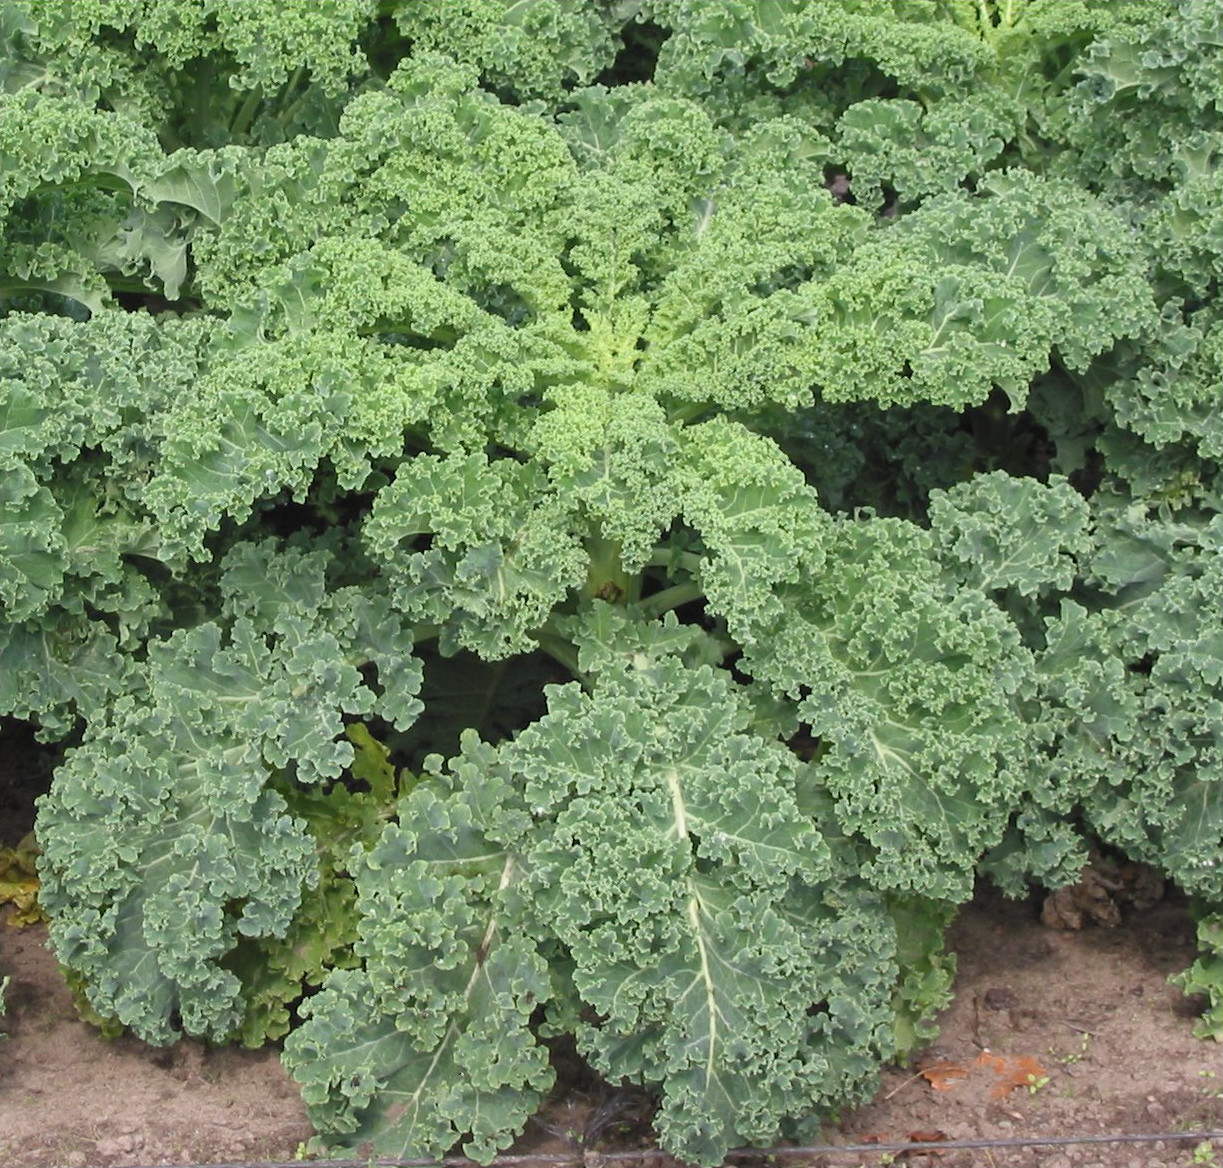

In [14]:
kale_image

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Sample documents
documents = [
    "Elephants are the largest land mammals on Earth",
    "The Great Wall of China is over 13,000 miles long",
    "Mozart composed his first symphony at age eight",
    "The human body contains approximately 37 trillion cells"
]

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)

# Query the system
query = "When did Mozart compose his first symphony?"
query_vector = vectorizer.transform([query])

# Calculate similarity scores
similarities = cosine_similarity(query_vector, tfidf_matrix)

# Get most similar documents
top_indices = similarities.argsort()[0][::-1]
for idx in top_indices:
    print(f"Score: {similarities[0][idx]:.4f} - {documents[idx]}")


Score: 0.7071 - Mozart composed his first symphony at age eight
Score: 0.0000 - The human body contains approximately 37 trillion cells
Score: 0.0000 - The Great Wall of China is over 13,000 miles long
Score: 0.0000 - Elephants are the largest land mammals on Earth


In [25]:
from sentence_transformers import SentenceTransformer
import faiss

# Load a pre-trained embedding model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Sample documents
documents = [
    "Elephants are the largest land mammals on Earth",
    "The Great Wall of China is over 13,000 miles long",
    "Mozart composed his first symphony at age eight",
    "The human body contains approximately 37 trillion cells"
]

# Create embeddings
embeddings = model.encode(documents)

# Build FAISS index
index = faiss.IndexFlatL2(embeddings.shape[1])
index.add(embeddings)

# Query and search
query = "When did Mozart compose his first symphony?"
query_embedding = model.encode([query])
_, result_indices = index.search(query_embedding, k=1)
print("Top document match:")
print(documents[result_indices[0][0]])


Top document match:
Mozart composed his first symphony at age eight


In [27]:
!echo ' \
Elephants are the largest land mammals on Earth \n \
The Great Wall of China is over 13,000 miles long \n \
Mozart composed his first symphony at age eight \n \
The human body contains approximately 37 trillion cells \n \
' > data/documents.txt

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [43]:
!rm -r ./data/chroma_db # remove if it exists

rm: ./data/chroma_db: No such file or directory


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [ ]:
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import Chroma
from langchain.chat_models import ChatOpenAI
from langchain.chains import RetrievalQA
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.document_loaders import TextLoader

# 1. Load and process documents
loader = TextLoader('data/documents.txt')
documents = loader.load()

# 2. Split into chunks
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=50,
    chunk_overlap=10,
    length_function=len,
    separators=["\n\n", "\n", " ", ""]
)
chunks = text_splitter.split_documents(documents)

# 3. Create embeddings and vector store
embeddings = OpenAIEmbeddings()
vectorstore = Chroma.from_documents(
    documents=chunks,
    embedding=embeddings,
    persist_directory="./data/chroma_db"
)

# 4. Create retriever
retriever = vectorstore.as_retriever(
    search_type="similarity",
    search_kwargs={"k": 3}
)

# 5. Create language model
llm = ChatOpenAI(temperature=0, model_name="gpt-4o-mini")

# 6. Create RAG chain
qa_chain = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=retriever,
    return_source_documents=True
)

# 7. Query the system
query = "When did Mozart compose his first symphony?"
response = qa_chain({"query": query})

print("Answer:", response["result"])
print("\nSource Documents:")
for doc in response["source_documents"]:
    print("\n", doc.page_content)


/var/folders/bx/2xw9j1ps5d59rqp_x5g321sm0000gn/T/ipykernel_83288/135212857.py:22: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAIEmbeddings``.
  embeddings = OpenAIEmbeddings()
/var/folders/bx/2xw9j1ps5d59rqp_x5g321sm0000gn/T/ipykernel_83288/135212857.py:36: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  llm = ChatOpenAI(temperature=0, model_name="gpt-4o-mini")
/var/folders/bx/2xw9j1ps5d59rqp_x5g32

Answer: Mozart composed his first symphony at age eight.

Source Documents:

 Mozart composed his first symphony at age eight

 age eight

 miles long


In [2]:
chunks

[Document(metadata={'source': 'data/documents.txt'}, page_content='Elephants are the largest land mammals on Earth'),
 Document(metadata={'source': 'data/documents.txt'}, page_content='The Great Wall of China is over 13,000 miles'),
 Document(metadata={'source': 'data/documents.txt'}, page_content='miles long'),
 Document(metadata={'source': 'data/documents.txt'}, page_content='Mozart composed his first symphony at age eight'),
 Document(metadata={'source': 'data/documents.txt'}, page_content='age eight'),
 Document(metadata={'source': 'data/documents.txt'}, page_content='The human body contains approximately 37'),
 Document(metadata={'source': 'data/documents.txt'}, page_content='37 trillion cells')]

In [3]:
response["source_documents"]

[Document(metadata={'source': 'data/documents.txt'}, page_content='Mozart composed his first symphony at age eight'),
 Document(metadata={'source': 'data/documents.txt'}, page_content='age eight'),
 Document(metadata={'source': 'data/documents.txt'}, page_content='miles long')]

In [4]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.document_loaders import TextLoader
import re

def preprocess_text(text):
    # Normalize case
    text = text.lower()
    # Remove special characters and extra whitespace
    text = re.sub(r'[^\w\s]', '', text)
    text = ' '.join(text.split())
    return text

# Example document
document = """
Asano Naganori (浅野 長矩, September 28, 1667 – April 21, 1701) was the daimyō of the Akō Domain in Japan (1675–1701). His title was Takumi no Kami (内匠頭). He is known as the person who triggered a series of incidents retold in a story known as Chūshingura (involving the forty-seven rōnin), one of the favourite themes of kabuki, jōruri, and Japanese books and films.

On the day of his death, he drew his short sword (Wakizashi) and attempted to kill Kira in the Corridor of the Pines at Edo Castle in what is now Tokyo. He was wounded and failed to kill Kira. On the same day, the fifth Tokugawa shōgun Tsunayoshi sentenced him to commit seppuku, which he did after writing his death poem:

「風さそう花よりも / なお我はまた / 春の名残を / いかにとやせん」

"kaze sasou / hana yori mo nao / ware ha mata / haru no nagori wo / ika ni toyasen."

"More than the cherry blossoms, Inviting a wind to blow them away, I am wondering what to do,

With the remaining springtime."
"""

# Create text splitter with specific chunk size and overlap
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=100,        # Characters per chunk
    chunk_overlap=20,      # Character overlap between chunks
    length_function=len,
    separators=["\n\n", "\n", " ", ""]  # Priority order for splitting
)

# Preprocess the document
processed_doc = preprocess_text(document)

# Split into chunks
chunks = text_splitter.create_documents([processed_doc])

# Display results
print("Number of chunks:", len(chunks))
print("\nChunks with overlap:")
for i, chunk in enumerate(chunks):
    print(f"\nChunk {i + 1}:")
    print(chunk.page_content)


Number of chunks: 11

Chunks with overlap:

Chunk 1:
asano naganori 浅野 長矩 september 28 1667 april 21 1701 was the daimyō of the akō domain in japan

Chunk 2:
akō domain in japan 16751701 his title was takumi no kami 内匠頭 he is known as the person who

Chunk 3:
as the person who triggered a series of incidents retold in a story known as chūshingura involving

Chunk 4:
involving the fortyseven rōnin one of the favourite themes of kabuki jōruri and japanese books and

Chunk 5:
japanese books and films on the day of his death he drew his short sword wakizashi and attempted to

Chunk 6:
and attempted to kill kira in the corridor of the pines at edo castle in what is now tokyo he was

Chunk 7:
is now tokyo he was wounded and failed to kill kira on the same day the fifth tokugawa shōgun

Chunk 8:
tokugawa shōgun tsunayoshi sentenced him to commit seppuku which he did after writing his death

Chunk 9:
writing his death poem 風さそう花よりも なお我はまた 春の名残を いかにとやせん kaze sasou hana yori mo nao ware ha mata 

In [14]:
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import FAISS
from langchain.docstore.document import Document

def filter_relevant_chunks(query, chunks, threshold=0.7, top_k=3):
    """
    Filters chunks based on FAISS similarity search, using both a similarity threshold and top-k selection.

    Args:
        query (str): User query string
        chunks (list): List of text chunks
        threshold (float): Minimum similarity score threshold
        top_k (int): Number of top chunks to return

    Returns:
        list: Sorted list of top relevant chunks with similarity scores
    """
    # Initialize embeddings
    embeddings = OpenAIEmbeddings()

    # Create FAISS index
    vectorstore = FAISS.from_documents(chunks, embeddings)

    # Perform similarity search with scores
    docs_and_scores = vectorstore.similarity_search_with_score(query, k=min(top_k, len(chunks)))

    # FAISS returns **distances**, where lower is better. We need to convert it to similarity.
    # Assuming FAISS uses cosine distance, we can convert it to similarity:
    relevant_chunks = [(doc.page_content, 1 - score) for doc, score in docs_and_scores]

    # Filter by similarity threshold
    filtered_chunks = [(text, similarity) for text, similarity in relevant_chunks if similarity >= threshold]

    # Sort by similarity score (descending order)
    top_chunks = sorted(filtered_chunks, key=lambda x: x[1], reverse=True)[:top_k]

    return top_chunks


# Example query
query = "Read me Asano Naganori's death poem in English, and then show me the kanji."

# Get relevant chunks
relevant_chunks = filter_relevant_chunks(
    query=query,
    chunks=chunks,
    threshold=0.5,
    top_k=4
)

# Display results
print("\nQuery:", query)
print("\nMost relevant chunks:")
for text, score in relevant_chunks:
    print(f"Score: {score:.3f} | Text: {text}")



Query: Read me Asano Naganori's death poem in English, and then show me the kanji.

Most relevant chunks:
Score: 0.737 | Text: writing his death poem 風さそう花よりも なお我はまた 春の名残を いかにとやせん kaze sasou hana yori mo nao ware ha mata haru
Score: 0.643 | Text: asano naganori 浅野 長矩 september 28 1667 april 21 1701 was the daimyō of the akō domain in japan
Score: 0.635 | Text: japanese books and films on the day of his death he drew his short sword wakizashi and attempted to
Score: 0.626 | Text: tokugawa shōgun tsunayoshi sentenced him to commit seppuku which he did after writing his death


In [17]:
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import FAISS
import time
import logging
from typing import List, Dict
import numpy as np

class RAGMonitor:
    def __init__(self):
        self.query_times = []
        self.retrieval_times = []
        self.relevance_scores = []
        logging.basicConfig(level=logging.INFO)
        self.logger = logging.getLogger(__name__)

    def log_metrics(self, metric_name: str, value: float):
        self.logger.info(f"{metric_name}: {value:.4f}")

    def calculate_statistics(self, values: List[float]) -> Dict[str, float]:
        return {
            "mean": np.mean(values),
            "median": np.median(values),
            "p95": np.percentile(values, 95),
            "p99": np.percentile(values, 99)
        }

class MonitoredRAG:
    def __init__(self, embeddings, monitor: RAGMonitor):
        self.embeddings = embeddings
        self.monitor = monitor
        self.index = None

    def create_index(self, texts: List[str]):
        start_time = time.time()
        self.index = FAISS.from_texts(texts, self.embeddings)
        index_time = time.time() - start_time
        self.monitor.log_metrics("index_creation_time", index_time)

    def query(self, query_text: str, k: int = 5):
        # Monitor query execution
        query_start = time.time()

        # Get embeddings and search
        retrieval_start = time.time()
        results = self.index.similarity_search_with_score(query_text, k=k)
        retrieval_time = time.time() - retrieval_start

        # Calculate relevance statistics
        scores = [score for _, score in results]

        # Log metrics
        total_time = time.time() - query_start
        self.monitor.query_times.append(total_time)
        self.monitor.retrieval_times.append(retrieval_time)
        self.monitor.relevance_scores.extend(scores)

        # Log current query metrics
        self.monitor.log_metrics("query_time", total_time)
        self.monitor.log_metrics("retrieval_time", retrieval_time)
        self.monitor.log_metrics("avg_relevance_score", np.mean(scores))

        return results

    def get_performance_report(self):
        report = {
            "query_times": self.monitor.calculate_statistics(self.monitor.query_times),
            "retrieval_times": self.monitor.calculate_statistics(self.monitor.retrieval_times),
            "relevance_scores": self.monitor.calculate_statistics(self.monitor.relevance_scores)
        }
        return report

# Example usage
if __name__ == "__main__":
    # Initialize
    monitor = RAGMonitor()
    embeddings = OpenAIEmbeddings()
    rag = MonitoredRAG(embeddings, monitor)

    # Create index
    texts = [
        "Asano Naganori (浅野 長矩, September 28, 1667 – April 21, 1701) was the daimyō of the Akō Domain in Japan (1675–1701). His title was Takumi no Kami (内匠頭). He is known as the person who triggered a series of incidents retold in a story known as Chūshingura (involving the forty-seven rōnin), one of the favourite themes of kabuki, jōruri, and Japanese books and films.",
        "He was born in Edo as the eldest son of Asano Nagatomo. His family was a branch of the Asano clan whose main lineage was in Hiroshima. His grandfather Naganao was appointed to the position of daimyō of Ako with 50 thousand koku. After Naganao died in 1671, Nagatomo succeeded to the position, but died after three years in 1675. Naganori succeeded his father at the age of nine.",
        "In 1680, he was appointed to the office of Takumi no Kami, the head of carpentry at the imperial court, but this office was nominal, as were other offices granted to samurai at that time, and only had an honorific meaning. As a daimyō with a small fief, he was appointed several times to temporary minor offices of the Tokugawa shogunate.",
        "In 1683, he was first appointed one of two officials to host the emissaries from the imperial court to the Shogunate. It was the first time he met Kira Yoshinaka, the highest-ranking kōke, the head of ceremonial matters at the Shogunate, who instructed officials in the manner of hosting noble guests from Kyoto.",
        "In 1694, he suffered from a serious illness. He had no children, thus no heir at that time. When a daimyo died without a determined heir, his house would be abolished by the shogunate, and his lands confiscated; his retainers became rōnin. To prevent this, he adopted his younger brother Asano Nagahiro, titled Daigaku, who was accepted as his heir apparent by the shogunate.",
        "In 1701, he was appointed for the second time to the same office. It is said that he was then on bad terms with Kira Yoshinaka, and tension between them increased.",
        "On the day of his death, he drew his short sword (Wakizashi) and attempted to kill Kira in the Corridor of the Pines at Edo Castle in what is now Tokyo. He was wounded and failed to kill Kira. On the same day, the fifth Tokugawa shōgun Tsunayoshi sentenced him to commit seppuku, which he did after writing his death poem:",
        "「風さそう花よりも / なお我はまた / 春の名残を / いかにとやせん」\n\n\"kaze sasou / hana yori mo nao / ware ha mata / haru no nagori wo / ika ni toyasen.\"\n\n\"More than the cherry blossoms, Inviting a wind to blow them away, I am wondering what to do,\n\nWith the remaining springtime.\"", 
        "He was buried in the graveyard of Sengaku-ji. His retainers became ronin when the Shogunate confiscated his fief. Under the leadership of Ōishi Kuranosuke, however, they avenged the death of their lord by killing Kira Yoshinaka at his mansion in Edo on December 15, 1702.",
        "These former retainers became famous as the forty-seven rōnin, and their vendetta ranks as one of the most renowned in Japan."
    ]
    rag.create_index(texts)

    # Perform queries
    queries = [
        "Why was Asano sentenced to commit seppuku?",
        "Read me Asano's death poem",
        "Was Asano a total bad ass or that?",
    ]

    for query in queries:
        results = rag.query(query, k=1)
        print(f"\nQuery: {query}")
        for doc, score in results:
            print(f"Score: {score:.4f} | Text: {doc.page_content}")

    # Get performance report
    report = rag.get_performance_report()
    print("\nPerformance Report:")
    print(report)


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:__main__:index_creation_time: 0.5876
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:__main__:query_time: 0.3716
INFO:__main__:retrieval_time: 0.3716
INFO:__main__:avg_relevance_score: 0.3088



Query: Why was Asano sentenced to commit seppuku?
Score: 0.3088 | Text: On the day of his death, he drew his short sword (Wakizashi) and attempted to kill Kira in the Corridor of the Pines at Edo Castle in what is now Tokyo. He was wounded and failed to kill Kira. On the same day, the fifth Tokugawa shōgun Tsunayoshi sentenced him to commit seppuku, which he did after writing his death poem:


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:__main__:query_time: 0.3256
INFO:__main__:retrieval_time: 0.3256
INFO:__main__:avg_relevance_score: 0.3479
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:__main__:query_time: 0.1678
INFO:__main__:retrieval_time: 0.1678
INFO:__main__:avg_relevance_score: 0.3464



Query: Read me Asano's death poem
Score: 0.3479 | Text: On the day of his death, he drew his short sword (Wakizashi) and attempted to kill Kira in the Corridor of the Pines at Edo Castle in what is now Tokyo. He was wounded and failed to kill Kira. On the same day, the fifth Tokugawa shōgun Tsunayoshi sentenced him to commit seppuku, which he did after writing his death poem:

Query: Was Asano a total bad ass or that?
Score: 0.3464 | Text: Asano Naganori (浅野 長矩, September 28, 1667 – April 21, 1701) was the daimyō of the Akō Domain in Japan (1675–1701). His title was Takumi no Kami (内匠頭). He is known as the person who triggered a series of incidents retold in a story known as Chūshingura (involving the forty-seven rōnin), one of the favourite themes of kabuki, jōruri, and Japanese books and films.

Performance Report:
{'query_times': {'mean': 0.2883443832397461, 'median': 0.325573205947876, 'p95': 0.3670341491699219, 'p99': 0.37071956634521486}, 'retrieval_times': {'mean': 0.2883437474

In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain.retrievers import BM25Retriever
from langchain.schema import Document
from typing import List

# Initialize components
llm = ChatOpenAI(model="gpt-4o-mini")
retriever = BM25Retriever.from_documents([
    Document(page_content="A320neo cooling system max temp: 85°C"),
    Document(page_content="Original A320 cooling system max temp: 75°C"),
])

def multi_step_query(complex_query: str) -> str:
    # Step 1: Decompose query into sub-questions
    decompose_prompt = ChatPromptTemplate.from_messages([
        ("system", "Break down this complex query into specific sub-questions. Only include numbered questions in your response. One question per line."),
        ("user", "{query}")
    ])

    decompose_response = llm.invoke(
        decompose_prompt.format_messages(query=complex_query)
    )
    sub_questions = decompose_response.content.split("\n")

    print("Decomposed into sub-questions:")
    for i, question in enumerate(sub_questions):
        print(question)
    print("--------------------------------------")

    # Step 2: Process each sub-question
    intermediate_results = []
    for question in sub_questions:
        # Retrieve relevant documents
        docs = retriever.get_relevant_documents(question)

        # Generate answer for sub-question
        answer_prompt = ChatPromptTemplate.from_messages([
            ("system", "Answer the question using the provided context."),
            ("user", "Context: {context}\nQuestion: {question}")
        ])

        context = "\n".join([doc.page_content for doc in docs])
        answer = llm.invoke(
            answer_prompt.format_messages(
                context=context,
                question=question
            )
        )

        print("Question:", question)
        print("Context:\n", context)
        print("Answer:", answer)
        print("--------------------------------------")

        intermediate_results.append(answer.content)

    # Step 3: Synthesize final response
    synthesis_prompt = ChatPromptTemplate.from_messages([
        ("system", "Synthesize a final answer from these intermediate results."),
        ("user", "Results: {results}\nOriginal Question: {query}")
    ])

    final_response = llm.invoke(
        synthesis_prompt.format_messages(
            results="\n".join(intermediate_results),
            query=complex_query
        )
    )


    return final_response.content

# Example usage
query = "What is the maximum operating temperature difference between the A320neo and original A320 cooling systems?"
result = multi_step_query(query)
print(f"Final Answer: {result}")

Decomposed into sub-questions:
1. What is the maximum operating temperature of the A320neo cooling system?  
2. What is the maximum operating temperature of the original A320 cooling system?  
3. How is the maximum operating temperature difference calculated?  
4. Are there any specific design changes in the A320neo cooling system compared to the original A320?  
5. What are the implications of the temperature difference for performance and efficiency?  
6. Are there any industry standards or regulations that affect the cooling systems of the A320neo and original A320?  
7. How do environmental factors influence the cooling systems of both aircraft models?  
8. What materials or technologies in the A320neo contribute to its cooling system performance?  
9. Have there been any reported issues related to cooling system temperatures in either aircraft model?  
10. What is the significance of understanding the temperature difference for maintenance and operation of the aircraft?  
--------

In [13]:
from langchain.chat_models import ChatOpenAI
from langchain.retrievers import BM25Retriever
from langchain.schema import Document
from langchain.prompts import ChatPromptTemplate

# Initialize components
llm = ChatOpenAI(model="gpt-4o-mini")
retriever = BM25Retriever.from_documents([
    Document(page_content="Q1 2023 Revenue: $28M"),
    Document(page_content="Q2 2023 Revenue: $20M"),
    Document(page_content="Q3 2023 Revenue: $48M"),
    Document(page_content="Q4 2023 Revenue: $98M"),
    Document(page_content="Q1 2024 Revenue: $50M"),
    Document(page_content="Q2 2024 Revenue: $45M"),
    Document(page_content="Q3 2024 Revenue: $48M"),
    Document(page_content="Q4 2024 Revenue: $42M"),
])

def self_querying_search(initial_query: str) -> str:
    print("Provided initial query:")
    print(initial_query)
    print("----------------------------------")

    # Step 1: Initial retrieval
    initial_docs = retriever.get_relevant_documents(initial_query)
    initial_context = "\n".join([doc.page_content for doc in initial_docs])

    # Step 2: Analyze and refine query
    refine_prompt = ChatPromptTemplate.from_messages([
        ("system", "Analyze the context and original query. If needed, create a more specific query. Only output the new query that we can pass directly into an LLM to invoke a response."),
        ("user", "Context: {context}\nOriginal Query: {query}")
    ])

    refined_query_response = llm.invoke(
        refine_prompt.format_messages(
            context=initial_context,
            query=initial_query
        )
    )
    refined_query = refined_query_response.content

    print("Generated refined query:")
    print(refined_query)
    print("----------------------------------")

    # Step 3: Perform refined search
    refined_docs = retriever.get_relevant_documents(refined_query)
    refined_context = "\n".join([doc.page_content for doc in refined_docs])

    # Step 4: Generate final response
    answer_prompt = ChatPromptTemplate.from_messages([
        ("system", "Generate a clear answer using the refined context."),
        ("user", "Context: {context}\nQuestion: {query}")
    ])


    rendered_prompt = answer_prompt.format_messages(
        context=refined_context,
        query=refined_query
    )
    print("Prompt for final response:")
    print(rendered_prompt)
    print("----------------------------------")

    final_response = llm.invoke(rendered_prompt)
    return final_response.content

# Example usage
query = "What was the company's revenue?"
result = self_querying_search(query)
print(f"Answer: {result}")


Provided initial query:
What was the company's revenue?
----------------------------------
Generated refined query:
What was the total revenue for the company in 2024?
----------------------------------
Prompt for final response:
[SystemMessage(content='Generate a clear answer using the refined context.', additional_kwargs={}, response_metadata={}), HumanMessage(content='Context: Q4 2024 Revenue: $42M\nQ3 2024 Revenue: $48M\nQ2 2024 Revenue: $45M\nQ1 2024 Revenue: $50M\nQuestion: What was the total revenue for the company in 2024?', additional_kwargs={}, response_metadata={})]
----------------------------------
Answer: To calculate the total revenue for the company in 2024, we add the revenue from each quarter:

Q1 2024: $50M  
Q2 2024: $45M  
Q3 2024: $48M  
Q4 2024: $42M  

Total Revenue = $50M + $45M + $48M + $42M = $185M

Therefore, the total revenue for the company in 2024 was $185 million.


In [15]:
from langchain.chat_models import ChatOpenAI
from langchain.retrievers import BM25Retriever
from langchain.schema import Document
from langchain.prompts import ChatPromptTemplate
from typing import List, Set

# Initialize components
llm = ChatOpenAI(model="gpt-4o-mini")
retriever = BM25Retriever.from_documents([
    Document(page_content="Service 'Alpha' requires Redis and PostgreSQL"),
    Document(page_content="Redis requires TCP port 6379"),
    Document(page_content="PostgreSQL requires TCP port 5432 and WAL logging"),
])

def recursive_retrieval(initial_query: str, max_depth: int = 3) -> str:
    explored = set()
    all_findings = []

    def explore_topic(query: str, depth: int) -> None:
        if depth >= max_depth or query in explored:
            print(f"[Depth {depth}] Skipping query (Already explored or max depth reached): {query}\n")
            return
        
        print(f"[Depth {depth}] Exploring query: {query}\n")
        explored.add(query)

        # Retrieve documents for current query
        docs = retriever.get_relevant_documents(query)
        context = "\n".join([doc.page_content for doc in docs])
        all_findings.append(context)
        
        print(f"[Depth {depth}] Retrieved Context:\n{context}\n")

        # Generate sub-queries based on findings
        sub_query_prompt = ChatPromptTemplate.from_messages([
            ("system", "Generate follow-up questions based on this context (max of 2). Only output the questions. Output one question per line."),
            ("user", "Context: {context}")
        ])

        sub_queries_response = llm.invoke(
            sub_query_prompt.format_messages(context=context)
        )
        sub_queries = sub_queries_response.content.split("\n")
        
        print(f"[Depth {depth}] Generated Sub-queries:\n{sub_queries}\n")
        
        # Recursively explore sub-queries
        for sub_query in sub_queries:
            if sub_query.strip():  # Ensure it's not an empty string
                explore_topic(sub_query.strip(), depth + 1)

    print("Starting Recursive Retrieval Process...\n")
    explore_topic(initial_query, 0)
    print("Recursive Retrieval Complete. Synthesizing Final Response...\n")

    # Synthesize final response
    synthesis_prompt = ChatPromptTemplate.from_messages([
        ("system", "Synthesize all findings into a comprehensive response."),
        ("user", "Findings: {findings}\nOriginal Query: {query}")
    ])

    rendered_synthesis_prompt = synthesis_prompt.format_messages(
        findings="\n".join(all_findings),
        query=initial_query
    )
    
    print("Prompt for Final Response:")
    print(rendered_synthesis_prompt)
    print("----------------------------------\n")

    final_response = llm.invoke(rendered_synthesis_prompt)
    return final_response.content

# Example usage
query = "Explain the dependency requirements for deploying the Alpha service"
result = recursive_retrieval(query)
print(f"Complete Analysis:\n{result}")


Starting Recursive Retrieval Process...

[Depth 0] Exploring query: Explain the dependency requirements for deploying the Alpha service

[Depth 0] Retrieved Context:
PostgreSQL requires TCP port 5432 and WAL logging
Redis requires TCP port 6379
Service 'Alpha' requires Redis and PostgreSQL

[Depth 0] Generated Sub-queries:
["What are the implications of using both PostgreSQL and Redis together in Service 'Alpha'?  ", "How can we ensure that both PostgreSQL and Redis are properly configured to work seamlessly for Service 'Alpha'?"]

[Depth 1] Exploring query: What are the implications of using both PostgreSQL and Redis together in Service 'Alpha'?

[Depth 1] Retrieved Context:
Service 'Alpha' requires Redis and PostgreSQL
Redis requires TCP port 6379
PostgreSQL requires TCP port 5432 and WAL logging

[Depth 1] Generated Sub-queries:
["What are the specific configurations needed for PostgreSQL's WAL logging in the context of Service 'Alpha'?  ", "How does the use of Redis enhance the fun

In [17]:
from langchain.chat_models import ChatOpenAI
from langchain.retrievers import BM25Retriever
from langchain.schema import Document
from langchain.prompts import ChatPromptTemplate
from typing import List, Dict, Tuple

# Initialize components
llm = ChatOpenAI(model="gpt-4o-mini")
retriever = BM25Retriever.from_documents([
    Document(page_content="Official docs: Product X requires 2GB RAM", metadata={"reliability": 0.9}),
    Document(page_content="Forum post: Product X works with 1GB RAM", metadata={"reliability": 0.5}),
    Document(page_content="Benchmark test: Product X performs best with 4GB RAM", metadata={"reliability": 0.8}),
])

def weighted_synthesis(query: str) -> str:
    print("Starting Weighted Synthesis Process...\n")
    
    # Step 1: Retrieve relevant documents
    print(f"Retrieving documents for query: {query}\n")
    docs = retriever.get_relevant_documents(query)
    
    print("Retrieved Documents:")
    for doc in docs:
        print(f"- Content: {doc.page_content}, Reliability: {doc.metadata.get('reliability', 0.5)}")
    print("----------------------------------\n")

    # Step 2: Prepare weighted contexts
    weighted_contexts: List[Tuple[str, float]] = [
        (doc.page_content, doc.metadata.get("reliability", 0.5))
        for doc in docs
    ]
    
    # Step 3: Generate initial summaries with confidence scores
    summary_prompt = ChatPromptTemplate.from_messages([
        ("system", "Summarize this information and assign a confidence score (0-1)."),
        ("user", "Content: {content}")
    ])

    summaries: List[Dict] = []
    print("Generating Summaries with Confidence Scores...\n")
    for content, weight in weighted_contexts:
        print(f"Processing Content (Weight {weight}): {content}\n")
        summary_response = llm.invoke(
            summary_prompt.format_messages(content=content)
        )
        summaries.append({
            "summary": summary_response.content,
            "weight": weight
        })
    
    print("Generated Summaries:")
    for s in summaries:
        print(f"- [Weight: {s['weight']}] {s['summary']}")
    print("----------------------------------\n")

    # Step 4: Synthesize final response with conflict resolution
    synthesis_prompt = ChatPromptTemplate.from_messages([
        ("system", """Synthesize a final response from these weighted summaries.
                     Resolve conflicts by favoring higher-weighted sources.
                     Acknowledge uncertainties when appropriate."""),
        ("user", "Summaries: {summaries}\nQuery: {query}")
    ])
    
    print("Synthesizing Final Response...\n")
    rendered_synthesis_prompt = synthesis_prompt.format_messages(
        summaries="\n".join([
            f"[Weight: {s['weight']}] {s['summary']}"
            for s in summaries
        ]),
        query=query
    )
    
    print("Prompt for Final Response:")
    print(rendered_synthesis_prompt)
    print("----------------------------------\n")
    
    final_response = llm.invoke(rendered_synthesis_prompt)
    return final_response.content

# Example usage
query = "What are the RAM requirements for Product X?"
result = weighted_synthesis(query)
print(f"Synthesized Response:\n{result}")


Starting Weighted Synthesis Process...

Retrieving documents for query: What are the RAM requirements for Product X?

Retrieved Documents:
- Content: Official docs: Product X requires 2GB RAM, Reliability: 0.9
- Content: Forum post: Product X works with 1GB RAM, Reliability: 0.5
- Content: Benchmark test: Product X performs best with 4GB RAM, Reliability: 0.8
----------------------------------

Generating Summaries with Confidence Scores...

Processing Content (Weight 0.9): Official docs: Product X requires 2GB RAM

Processing Content (Weight 0.5): Forum post: Product X works with 1GB RAM

Processing Content (Weight 0.8): Benchmark test: Product X performs best with 4GB RAM

Generated Summaries:
- [Weight: 0.9] Product X requires a minimum of 2GB RAM according to the official documentation. Confidence score: 1.0
- [Weight: 0.5] Summary: A forum post indicates that Product X is compatible with devices that have 1GB of RAM. 

Confidence Score: 0.9
- [Weight: 0.8] Summary: Product X shows

In [ ]:
from typing import Literal, TypedDict, Annotated
from langgraph.graph import Graph, START, END
from langchain_core.messages import HumanMessage, AIMessage
from langchain_openai import ChatOpenAI

# Define state
class AgentState(TypedDict):
    messages: list[HumanMessage | AIMessage]
    selected_path: str

# Create LLM
llm = ChatOpenAI(model="gpt-4o-mini")

def route_decision(state) -> Literal["path_a", "path_b"]:
    if "TAKE PATH A" in state["selected_path"]:
        return "path_a"
    elif "TAKE PATH B" in state["selected_path"]:
        return "path_b"
    else:
        raise ValueError(f"Bad response: {decision_text}")

# Define nodes
def get_decision(state):
    # Get the last message
    messages = state["messages"]

    # Ask LLM to make a decision
    response = llm.invoke(
        [
            *messages,
            HumanMessage(content="Flip a coin. Then declare 'TAKE PATH A' if you get heads or 'TAKE PATH B' if you get tails. Let me know the result of the coin experiment. Make sure you keep it fair! After you tell me what path to take stop talking.")
        ]
    )

    # Update state with decision
    state["selected_path"] = response.content
    return state

def path_a(state):
    response = llm.invoke(
        [
            *state["messages"],
            HumanMessage(content="Better to stay home. Justify why this makes sense.")
        ]
    )
    state["messages"].append(response)
    return state

def path_b(state):
    response = llm.invoke(
        [
            *state["messages"],
            HumanMessage(content="Go to Japan. Justify why this makes sense.")
        ]
    )
    state["messages"].append(response)
    return state

# Create workflow
workflow = Graph()

# Add nodes
workflow.add_node("decision", get_decision)
workflow.add_node("path_a", path_a)
workflow.add_node("path_b", path_b)

workflow.add_edge(START, "decision")

# Add conditional edges
workflow.add_conditional_edges(
    "decision",
    route_decision,
)

# Add end
workflow.add_edge("path_a", END)
workflow.add_edge("path_b", END)

# Compile
graph = workflow.compile()

# Run example
response = graph.invoke({
    "messages": [
        HumanMessage(content="I want to go on vacation but I only have $500")
    ],
    "selected_path": ""
})

print("\nFinal Response:")
print(response["messages"][-1].content)



Final Response:
While $500 may seem like a limited budget for a vacation to Japan, there are various ways to make it work, especially if you plan and get creative. Here are a few justifications and strategies for why this trip could still be a feasible option:

1. **Flight Deals**: If you can find a last-minute flight deal or use points from frequent flyer programs, you might be able to secure a reasonably priced ticket. Occasionally, budget airlines offer special fares to Japan, especially from major hubs.

2. **Accommodation Options**: Japan has a wide range of accommodation options that can fit various budgets. Consider staying at hostels, capsule hotels, or guesthouses, which are not only affordable but also provide a unique cultural experience.

3. **Transportation**: Japan’s public transportation system is efficient and affordable. Investing in a Japan Rail Pass for long-distance travel (if you plan to travel across cities) can be cost-effective. For local travel, use day passes

In [50]:
response["selected_path"]

'Flipping the coin... \n\nResult: Tails.\n\nTAKE PATH B.'

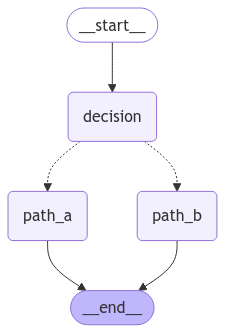

In [ ]:
from io import BytesIO
from PIL import Image
from IPython.display import display

img = graph.get_graph().draw_mermaid_png()

with open("img/LangGraph_Simple_Router_Agent_with_a_Single_Decision_Node.png", "wb") as f:
    f.write(img)

display(Image.open(BytesIO(img)))

In [ ]:
from langgraph.prebuilt import create_react_agent
from langchain_openai import ChatOpenAI
import math

model = ChatOpenAI(model="gpt-4o", temperature=0)

# Importing required modules
from langchain_core.tools import tool

@tool
def square_root(number: float) -> float:
    """Calculates the square root of a given number."""
    if number < 0:
        return "Error: Cannot calculate the square root of a negative number."
    return math.sqrt(number)

@tool
def square(number: float) -> float:
    """Calculates the square of a given number."""
    return number * number

# Assign the tool to the tools list
tools = [square_root, square]

# Define the graph
graph = create_react_agent(model, tools=tools)

inputs = {"messages": [("user", "calculate the hypotenuse of a triangle with sides 5 x 8")]}
for message in graph.stream(inputs):
    print(message)

{'agent': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_00oEOXtytB1Jo7UxpMBdOzj0', 'function': {'arguments': '{"number": 5}', 'name': 'square'}, 'type': 'function'}, {'id': 'call_emkS6FJZHlbsTWyehSuhpGkM', 'function': {'arguments': '{"number": 8}', 'name': 'square'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 43, 'prompt_tokens': 82, 'total_tokens': 125, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_eb9dce56a8', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-b2b6e626-4a22-4eba-8a9e-229095e45a03-0', tool_calls=[{'name': 'square', 'args': {'number': 5}, 'id': 'call_00oEOXtytB1Jo7UxpMBdOzj0', 'type': 'tool_call'}, {'name': 'square', 'args': {'number': 8}, 'id': 'call_emkS6

In [75]:
from langchain.memory import ConversationBufferMemory
from langchain_core.messages import HumanMessage, AIMessage
from langchain_openai import ChatOpenAI

# Initialize memory
memory = ConversationBufferMemory(
    memory_key="chat_history",
    return_messages=True
)

# Initialize chat model
llm = ChatOpenAI(model="gpt-4o-mini")

# Example conversation
memory.chat_memory.add_message(HumanMessage(content="My name is Alice"))
memory.chat_memory.add_message(AIMessage(content="Hello Alice! Nice to meet you."))

# Retrieve context for next interaction
chat_history = memory.load_memory_variables({})["chat_history"]

# Use memory in next interaction
response = llm.invoke(
    [
        *chat_history,
        HumanMessage(content="What's my name?")
    ]
)

print(response.content)  # Should reference "Alice"


Your name is Alice!


In [ ]:
from typing import TypedDict, Annotated, Sequence
from langgraph.graph import Graph, START, END
from langchain_core.messages import HumanMessage, AIMessage
from langchain_openai import ChatOpenAI

# Define state
class AgentState(TypedDict):
    messages: Sequence[HumanMessage | AIMessage]
    current_step: str
    budget_confirmed: bool
    destination_confirmed: bool
    dates_confirmed: bool

# Create LLM
llm = ChatOpenAI()

# Define nodes
def process_budget(state):
    messages = state["messages"]
    response = llm.invoke(
        [
            *messages,
            HumanMessage(content="Analyze the budget mentioned. Is it reasonable for a vacation? Respond with SUFFICIENT or INSUFFICIENT. Do not include any other words in your response.")
        ]
    )
    state["budget_confirmed"] = response.content.strip() == "SUFFICIENT"
    state["messages"].append(AIMessage(content=f"Budget analysis: {response.content}"))
    return state

def route(state):
    return state

def suggest_destination(state):
    messages = state["messages"]
    response = llm.invoke(
        [
            *messages,
            HumanMessage(content="Based on the budget and preferences, suggest a specific destination.")
        ]
    )
    state["destination_confirmed"] = True
    state["messages"].append(response)
    return state

def plan_dates(state):
    messages = state["messages"]
    response = llm.invoke(
        [
            *messages,
            HumanMessage(content="Suggest optimal travel dates considering the destination and budget.")
        ]
    )
    state["dates_confirmed"] = True
    state["messages"].append(response)
    return state

def insufficient_budget(state):
    response = llm.invoke(
        [
            *state["messages"],
            HumanMessage(content="I need you to tell me that the budget is insufficient. Console me the best you can, but be clear that my vacation dreams are over.")
        ]
    )
    state["messages"].append(response)
    return state

# Define conditional routing
def route_next_step(state):
    if not state["budget_confirmed"]:
        return "insufficient_budget"
    elif not state["destination_confirmed"]:
        return "suggest_destination"
    elif not state["dates_confirmed"]:
        return "plan_dates"
    else:
        return "end"

# Create workflow
workflow = Graph()

# Add nodes
workflow.add_node("process_budget", process_budget)
workflow.add_node("route", route)
workflow.add_node("insufficient_budget", insufficient_budget)
workflow.add_node("suggest_destination", suggest_destination)
workflow.add_node("plan_dates", plan_dates)

# Add edges
workflow.add_edge(START, "process_budget")
workflow.add_edge("process_budget", "route")
workflow.add_edge("insufficient_budget", END)
workflow.add_edge("suggest_destination", "route")
workflow.add_edge("plan_dates", "route")

# Add conditional edges
workflow.add_conditional_edges(
    "route",
    route_next_step,
    {
        "insufficient_budget": "insufficient_budget",
        "suggest_destination": "suggest_destination",
        "plan_dates": "plan_dates",
        "end": END,
    }
)

# Compile
graph = workflow.compile()

# Run example
response = graph.invoke({
    "messages": [
        HumanMessage(content="I want to plan a vacation with a budget of $2000")
    ],
    "current_step": "process_budget",
    "budget_confirmed": False,
    "destination_confirmed": False,
    "dates_confirmed": False
})

print("\nFinal Itinerary:")
for message in response["messages"]:
    print(message.content)



Final Itinerary:
I want to plan a vacation with a budget of $2000
Budget analysis: SUFFICIENT
One great destination that can be enjoyed on a budget of $2000 is Cancun, Mexico. With its beautiful beaches, vibrant nightlife, and rich culture, Cancun offers a mix of relaxation and excitement. You can take advantage of all-inclusive resort packages, enjoy delicious local cuisine, explore Mayan ruins, and go on various excursions such as snorkeling, zip-lining, or swimming with dolphins. Flights to Cancun from the US are usually affordable, and accommodations can be found at budget-friendly prices. Overall, Cancun is a fantastic destination that offers great value for your vacation budget.
For optimal travel dates to Cancun with a budget of $2000, it's important to consider both the weather and the potential for lower prices. The best time to visit Cancun for good weather and lower prices is during the shoulder seasons of late April to early June or late November to mid-December. During th

In [86]:
response

{'messages': [HumanMessage(content='I want to plan a vacation with a budget of $2000', additional_kwargs={}, response_metadata={}),
  AIMessage(content='Budget analysis: SUFFICIENT', additional_kwargs={}, response_metadata={}),
  AIMessage(content='One great destination that can be enjoyed on a budget of $2000 is Cancun, Mexico. With its beautiful beaches, vibrant nightlife, and rich culture, Cancun offers a mix of relaxation and excitement. You can take advantage of all-inclusive resort packages, enjoy delicious local cuisine, explore Mayan ruins, and go on various excursions such as snorkeling, zip-lining, or swimming with dolphins. Flights to Cancun from the US are usually affordable, and accommodations can be found at budget-friendly prices. Overall, Cancun is a fantastic destination that offers great value for your vacation budget.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 123, 'prompt_tokens': 46, 'total_tokens': 169, 'completi

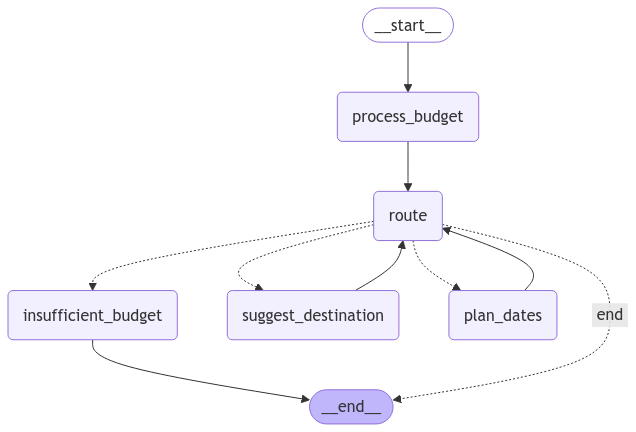

In [ ]:
from io import BytesIO
from PIL import Image
from IPython.display import display

img = graph.get_graph().draw_mermaid_png()

with open("img/LangGraph_Travel_Planning_Agent.png", "wb") as f:
    f.write(img)

display(Image.open(BytesIO(img)))

In [ ]:
# Compile
graph = workflow.compile()

# Run example
response = graph.invoke({
    "messages": [
        HumanMessage(content="I want to plan a vacation with a budget of $1")
    ],
    "current_step": "process_budget",
    "budget_confirmed": False,
    "destination_confirmed": False,
    "dates_confirmed": False
})

print("\nFinal Itinerary:")
for message in response["messages"]:
    print(message.content)


Final Itinerary:
I want to plan a vacation with a budget of $1
Budget analysis: INSUFFICIENT
I'm sorry to inform you that your budget of $1 is insufficient to plan a vacation. I understand that this may be disappointing, but there are still other ways to have a fun and enjoyable time without going on a traditional vacation. Perhaps you could consider having a staycation, exploring local attractions, or even just taking a day trip to a nearby destination. Remember, the most important thing is to make the most out of the resources you have available. I'm here to help you brainstorm alternative ideas within your budget constraints.


In [60]:
from typing import TypedDict, Annotated, Sequence, Literal
from langgraph.graph import Graph, START, END
from langchain_core.messages import BaseMessage, HumanMessage, AIMessage, ToolMessage
from langgraph.graph.message import add_messages
from langchain_core.tools import tool
from langchain_openai import ChatOpenAI
from langgraph.prebuilt import ToolNode
from langchain_core.tools import Tool

# Define state
class PlannerState(TypedDict):
    messages: list[BaseMessage]
    plan: list[str]
    current_step: int
    status: str

# Define tools with proper decorators
@tool
def fetch_interests() -> list[str]:
    """Fetch user's interests and hobbies."""
    return ["Dancing", "Live Music", "Karaoke"]

@tool
def check_calendar() -> dict[str, list[str]]:
    """Check available dates in calendar."""
    return {"available_dates": ["2025-03-15", "2025-03-16", "2025-03-22"]}

@tool
def get_venues() -> list[dict]:
    """Search for available venues matching criteria."""
    return [
        {"name": "Club Neon", "location": "Downtown", "capacity": 100},
        {"name": "The Jazz Bar", "location": "Midtown", "capacity": 50},
    ]

@tool
def call_venue(venue_name: str) -> str:
    """Call a venue to check availability and booking details."""
    return f"Called {venue_name}, they are available for booking."

@tool
def find_friends() -> list[dict]:
    """Find friends to invite to the event."""
    return [
        {"name": "Marie", "email": "Marie@example.com"},
        {"name": "Bohr", "email": "Bohr@example.com"},
        {"name": "Dirac", "email": "Dirac@example.com"},
    ]

@tool
def email_friends(friend_emails: list[str], message: str) -> str:
    """Send email invitations to friends."""
    for email in friend_emails:
        print(f"Emailed {email}")
    return "Friends have been emailed"

# Collect all tools
tools = [
    fetch_interests,
    check_calendar,
    get_venues,
    call_venue,
    find_friends,
    email_friends
]

tools_by_name = {tool.name: tool for tool in tools}
def tool_node(state: PlannerState) -> PlannerState:
    for tool_call in state["messages"][-1].tool_calls:
        tool = tools_by_name[tool_call["name"]]
        observation = tool.invoke(tool_call["args"])
        state["messages"].append(ToolMessage(content=str(observation), tool_call_id=tool_call["id"]))
    return state


# Create LLM with tools bound
model = ChatOpenAI(model="gpt-4o-mini").bind_tools(tools)

def create_plan(state: PlannerState) -> PlannerState:
    # Create human prompt
    state["messages"].append(
        HumanMessage(content="Create a step-by-step plan to accomplish this task. Return only numbered steps and a maximum of 5 steps.")
    )
    response = model.invoke(state["messages"])

    # Append the response to the messages, it will be included in the
    # context below when running "execute_step"
    state["messages"].append(response)

    # Extract the plan
    state["plan"] = [step.strip() for step in response.content.split("\n") if step.strip()]
    state["current_step"] = 0
    return state

def execute_step(state: PlannerState) -> PlannerState:
    current_step = state["plan"][state["current_step"]]

    # Create human prompt
    state["messages"].append(HumanMessage(content=f"Execute this step: {current_step}"))
    response = model.invoke(state["messages"])

    # Append response to messages to carry forward full conversation context
    state["messages"].append(response)

    # Progress to the next step
    state["current_step"] += 1
    return state

def summarize_result(state: PlannerState) -> PlannerState:
    state["messages"].append(HumanMessage(content=f"Summarize the plan that you have come up with"))
    response = model.invoke(state["messages"])

    # Append response to messages to carry forward full conversation context
    state["messages"].append(response)
    return state

def should_use_tools(state: PlannerState) -> Literal["tools", "check_completion"]:
    messages = state["messages"]
    last_message = messages[-1]
    # If the LLM makes a tool call, route to the tools node
    if hasattr(last_message, 'tool_calls') and last_message.tool_calls:
        return "tools"

    # Otherwise, continue to completion check
    return "check_completion"

def check_completion(state: PlannerState) -> PlannerState:
    if state["current_step"] >= len(state["plan"]):
        state["status"] = "complete"
    else:
        state["status"] = "in_progress"
    return state

def route_check_completion(state: PlannerState) -> Literal["execute_step", "summarize_result"]:
    if state["status"] == "in_progress":
        return "execute_step"
    else:
        return "summarize_result"

# Create workflow
workflow = Graph()

# Add nodes
workflow.add_node("create_plan", create_plan)
workflow.add_node("execute_step", execute_step)
workflow.add_node("check_completion", check_completion)
workflow.add_node("summarize_result", summarize_result)
workflow.add_node("tools", tool_node)

# Add edges
workflow.add_edge(START, "create_plan")
workflow.add_edge("create_plan", "execute_step")
workflow.add_conditional_edges(
    "execute_step",
    should_use_tools,
)
workflow.add_edge("tools", "check_completion")
workflow.add_conditional_edges("check_completion", route_check_completion)
workflow.add_edge("summarize_result", END)

# Compile
graph = workflow.compile()

# Initial state
inputs = {
    "messages": [
        HumanMessage(content="Plan my birthday party")
    ],
    "plan": [],
    "current_step": 0,
    "status": "starting"
}

# Execute
state_history = []
for state in graph.stream(inputs):
    state_history.append(state)
    state_key = list(state.keys())[0]
    print(repr(state[state_key]["messages"][-1]))


AIMessage(content='1. **Determine Your Interests and Theme**: Identify your interests and decide on a theme for the birthday party.\n2. **Set a Date**: Check your calendar to choose a suitable date for the celebration.\n3. **Find a Venue**: Look for available venues that fit the theme and can accommodate guests.\n4. **Invite Friends**: Compile a list of friends to invite and send them invitations via email.\n5. **Finalize Details**: Confirm the venue booking and finalize the party details such as decorations, food, and activities.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 112, 'prompt_tokens': 169, 'total_tokens': 281, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_709714d124', 'finish_reason': 'stop', 'logprobs'

In [62]:
state_history[-1]

{'summarize_result': {'messages': [HumanMessage(content='Plan my birthday party', additional_kwargs={}, response_metadata={}),
   HumanMessage(content='Create a step-by-step plan to accomplish this task. Return only numbered steps and a maximum of 5 steps.', additional_kwargs={}, response_metadata={}),
   AIMessage(content='1. **Determine Your Interests and Theme**: Identify your interests and decide on a theme for the birthday party.\n2. **Set a Date**: Check your calendar to choose a suitable date for the celebration.\n3. **Find a Venue**: Look for available venues that fit the theme and can accommodate guests.\n4. **Invite Friends**: Compile a list of friends to invite and send them invitations via email.\n5. **Finalize Details**: Confirm the venue booking and finalize the party details such as decorations, food, and activities.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 112, 'prompt_tokens': 169, 'total_tokens': 281, 'completion_t

In [69]:
print(state_history[-1]["summarize_result"]["messages"][-1].content)

Here's the summary of your birthday party plan:

1. **Interests and Theme**: The party will focus on dancing, live music, and karaoke.
2. **Date Selection**: You can choose from the available dates: March 15, March 16, or March 22, 2025.
3. **Venue**: The party will be held at **Club Neon** in Downtown, which has a capacity of 100 guests.
4. **Invitations**: Invitations have been sent to your friends Marie, Bohr, and Dirac, asking them to confirm their availability for one of the selected dates.
5. **Venue Booking**: Club Neon is available for booking, and you can proceed with finalizing the details such as decorations, food, and activities once the date is chosen.

You are now set for an exciting birthday celebration!


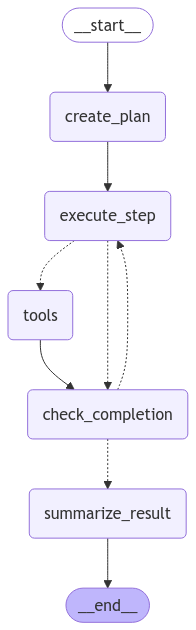

In [61]:
from io import BytesIO
from PIL import Image
from IPython.display import display

img = graph.get_graph().draw_mermaid_png()

with open("img/LangGraph_Task_Planning_Agent.png", "wb") as f:
    f.write(img)

display(Image.open(BytesIO(img)))

In [ ]:
"""
This cell will not execute in the notebook. You can copy it over to a script in order to run it.

Dependencies:
mcp==1.9.2
"""

import asyncio
import sys
import re
from typing import Optional
from contextlib import AsyncExitStack

from mcp import ClientSession, StdioServerParameters
from mcp.client.stdio import stdio_client

LIBRARY_NAME = "numpy"
TOPIC = "tensors"


class Context7Client:
    def __init__(self):
        # Initialize session and client objects
        self.session: Optional[ClientSession] = None
        self.exit_stack = AsyncExitStack()

    async def connect_to_server(self):
        """Connect to Context7 MCP server via npx"""
        server_params = StdioServerParameters(
            command="npx",
            args=["-y", "@upstash/context7-mcp"],
            env=None
        )
        
        stdio_transport = await self.exit_stack.enter_async_context(stdio_client(server_params))
        self.stdio, self.write = stdio_transport
        self.session = await self.exit_stack.enter_async_context(ClientSession(self.stdio, self.write))
        
        await self.session.initialize()
        print("✅ Connected to Context7 MCP server")
        
        # List available tools
        response = await self.session.list_tools()
        tools = response.tools
        print("🔧 Available tools:", [tool.name for tool in tools])

    async def resolve_library_id(self, library_name: str) -> str:
        """Resolve library name to Context7-compatible ID"""
        print(f"🔍 Resolving library ID for '{library_name}'...")
        resolve_resp = await self.session.call_tool(
            "resolve-library-id", {"libraryName": library_name}
        )
        
        if hasattr(resolve_resp, 'content'):
            # Handle the response content properly
            library_id_response = resolve_resp.content[0].text if resolve_resp.content else str(resolve_resp)
        else:
            library_id_response = resolve_resp.get("context7CompatibleLibraryID", str(resolve_resp))
        
        # Extract the actual library ID from the text using regex
        library_id_match = re.search(r'Context7-compatible library ID:\s*(\/[\w\-]+\/[\w\.\-]+)', str(library_id_response))
        if library_id_match:
            library_id = library_id_match.group(1)
            print(f"🔗 Extracted library ID for '{library_name}':", library_id)
            return library_id
        else:
            print(library_id_response)
            raise Exception("Could not extract library ID from response (see full output above)")

    async def get_docs(self, library_id: str, topic: str) -> str:
        """Fetch documentation for a library on a specific topic"""
        print(f"📚 Fetching docs for topic '{topic}'...")
        docs_resp = await self.session.call_tool(
            "get-library-docs",
            {"context7CompatibleLibraryID": library_id, "topic": topic, "tokens": 5000},
        )
        
        if hasattr(docs_resp, 'content'):
            docs_content = docs_resp.content[0].text if docs_resp.content else str(docs_resp)
        else:
            docs_content = docs_resp.get("docs", str(docs_resp))
        
        return docs_content

    async def cleanup(self):
        """Clean up resources"""
        await self.exit_stack.aclose()
        print("🧹 Resources cleaned up")


async def main(library_name: str = LIBRARY_NAME, topic: str = TOPIC):
    """Main function to run the Context7 client"""
    client = Context7Client()
    try:
        await client.connect_to_server()
        
        # Resolve library ID
        library_id = await client.resolve_library_id(library_name)
        
        # Get documentation
        docs_content = await client.get_docs(library_id, topic)
        
        # Print documentation
        print(f"📖 Documentation for {library_name} on {topic}:")
        print("-" * 50)
        print(docs_content[:1000])
        print("-" * 50)
        print(f"Above is only the first 1000 characters of the {len(docs_content)} characters of docs returned by the Context7 MCP server.")
        
    except Exception as e:
        print(f"💥 Fatal error: {str(e)}")
        sys.exit(1)
    finally:
        await client.cleanup()


if __name__ == "__main__":
    # Allow command line arguments to override defaults
    library = sys.argv[1] if len(sys.argv) > 1 else LIBRARY_NAME
    topic_arg = sys.argv[2] if len(sys.argv) > 2 else TOPIC

    print(f"🚀 Starting Context7 client for library '{library}' and topic '{topic_arg}'")
    asyncio.run(main(library, topic_arg))

In [ ]:
"""
This cell will not execute in the notebook. You can copy it over to a script in order to run it.

Dependencies:
langchain-mcp-adapters==0.1.4
langgraph==0.4.8
langchain==0.3.25
langchain-anthropic==0.3.15
"""

import asyncio
from langchain_mcp_adapters.client import MultiServerMCPClient
from langgraph.prebuilt import create_react_agent

async def main():
    client = MultiServerMCPClient(
        {
            "context7": {
                "command": "npx",
                "args": ["-y", "@upstash/context7-mcp"],
                "transport": "stdio",
            }
        }
    )
    
    tools = await client.get_tools()
    agent = create_react_agent(
        "anthropic:claude-3-5-haiku-latest",
        tools
    )
    
    print("Context7 MCP Agent Ready!")
    print("Type 'quit' to exit")
    
    while True:
        user_input = input("\nYou: ")
        if user_input.lower() in ['quit', 'exit']:
            break
            
        try:
            response = await agent.ainvoke(
                {"messages": [{"role": "user", "content": user_input}]}
            )
            last_message = response['messages'][-1]
            print(f"Agent: {last_message.content}")
        except Exception as e:
            print(f"Error: {e}")

if __name__ == "__main__":
    asyncio.run(main())